In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [2]:
train.shape

(137, 43)

Outliers

In [3]:
index_values = train[train["revenue"]>8000000].index
train = train.drop(index_values)
train = train.set_index("Id")
train

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,11/06/2002,Ankara,Big Cities,FC,3,4.0,4.0,5.0,3,4,...,2.0,0,0,0,0,0,0,0,0,3199619.0
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,3.0,0,0,0,0,0,0,0,0,5787594.0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2544857.0


DATETIME INDEX

In [4]:
from datetime import datetime

In [5]:
#open date and end date difference
def get_age(open_date):
  open_date = datetime.strptime(open_date,"%m/%d/%Y")
  difference = datetime.strptime("12/31/2015","%m/%d/%Y") - open_date
  return difference.days

In [6]:
train['Year'] = pd.DatetimeIndex(train['Open Date']).year#year
train['Month'] = pd.DatetimeIndex(train['Open Date']).month#month
train['Day_of_week']=pd.DatetimeIndex(train['Open Date']).dayofweek# dayofweek
train['Weekend']=train.apply(lambda row: 1 if row['Day_of_week'] >= 5 else 0,axis=1)#weekend
train['Age_of_Restaurent']=train.apply(lambda row: get_age(row["Open Date"]),axis = 1)#age of restaurent 



# drop open date
train=train.drop("Open Date",axis = 1)
train
#here we seperate the year,month,day for the open date column

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P34,P35,P36,P37,revenue,Year,Month,Day_of_week,Weekend,Age_of_Restaurent
Id,,,,,,,,,,,,,,,,,,,,,
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,4,3,4,5653753.0,1999,7,5,1,6011
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,6923131.0,2008,2,3,0,2877
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,2055379.0,2013,3,5,1,1027
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,18,12,12,6,2675511.0,2012,2,3,0,1428
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,3,4,3,3,4316715.0,2009,5,5,1,2427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Ankara,Big Cities,FC,3,4.0,4.0,5.0,3,4,5,...,0,0,0,0,3199619.0,2002,11,2,0,4803
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,...,0,0,0,0,5787594.0,2008,6,2,0,2745
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,...,0,0,0,0,2544857.0,2006,7,5,1,3463


CATEGORICAL FEATURES

In [7]:
#do feature encoding for train and test
from sklearn.preprocessing import LabelEncoder
#label encoder for city
city_label_encoder = LabelEncoder()
city_label_encoder = city_label_encoder.fit(train['City'])
train['City'] = city_label_encoder.transform(train['City'])
#one hot encoder for citygroup and type-train
train = pd.get_dummies(train, columns = ['City Group', 'Type'])
train = train.reset_index()
train

,Id,City,P1,P2,P3,P4,P5,P6,P7,P8,...,Year,Month,Day_of_week,Weekend,Age_of_Restaurent,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,0,31,4,5.0,4.0,4.0,2,2,5,4,...,1999,7,5,1,6011,1,0,0,0,1
1,1,3,4,5.0,4.0,4.0,1,2,5,5,...,2008,2,3,0,2877,1,0,0,1,0
2,2,10,2,4.0,2.0,5.0,2,3,5,5,...,2013,3,5,1,1027,0,1,0,0,1
3,3,28,6,4.5,6.0,6.0,4,4,10,8,...,2012,2,3,0,1428,0,1,0,0,1
4,4,14,3,4.0,3.0,4.0,2,2,5,5,...,2009,5,5,1,2427,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,131,3,3,4.0,4.0,5.0,3,4,5,4,...,2002,11,2,0,4803,1,0,0,1,0
124,132,29,2,3.0,3.0,5.0,4,2,4,4,...,2008,6,2,0,2745,0,1,0,1,0
125,134,18,3,4.0,4.0,4.0,2,3,5,5,...,2006,7,5,1,3463,0,1,0,1,0
126,135,31,4,5.0,4.0,5.0,2,2,5,5,...,2010,10,4,0,1889,1,0,0,1,0


In [8]:
p_columns = [column_name for column_name in train.columns if "P" in column_name]
non_p_columns = [column_name for column_name in train.columns if "P" not in column_name]
train_non_p_data = train[non_p_columns]
train_p_data = train[p_columns]
# p columns for minmax scalar
# non_p_columns are removed

MinMaxScaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
minmax_scalar = MinMaxScaler()
minmax_scalar = minmax_scalar.fit(train_p_data)
train_p_data = pd.DataFrame(minmax_scalar.transform(train_p_data),columns = p_columns)
train_p_data

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0.272727,0.615385,0.533333,0.222222,0.142857,0.111111,0.444444,0.333333,0.166667,0.166667,...,0.086957,0.400000,0.2,0.200000,0.16,0.833333,0.208333,0.266667,0.15,0.500
1,0.272727,0.615385,0.533333,0.222222,0.000000,0.111111,0.444444,0.444444,0.166667,0.166667,...,0.173913,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
2,0.090909,0.461538,0.266667,0.444444,0.142857,0.222222,0.444444,0.444444,0.166667,0.166667,...,0.000000,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
3,0.454545,0.538462,0.800000,0.666667,0.428571,0.333333,1.000000,0.777778,1.000000,1.000000,...,0.130435,1.000000,1.0,0.800000,0.40,1.000000,0.750000,0.800000,0.60,0.750
4,0.181818,0.461538,0.400000,0.222222,0.142857,0.111111,0.444444,0.444444,0.166667,0.166667,...,0.000000,0.400000,0.2,0.066667,0.12,0.333333,0.125000,0.266667,0.15,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.181818,0.461538,0.533333,0.444444,0.285714,0.333333,0.444444,0.333333,0.000000,0.000000,...,0.173913,0.266667,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
124,0.090909,0.307692,0.400000,0.444444,0.428571,0.111111,0.333333,0.333333,0.000000,0.000000,...,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
125,0.181818,0.461538,0.533333,0.222222,0.142857,0.222222,0.444444,0.444444,0.166667,0.166667,...,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
126,0.272727,0.615385,0.533333,0.444444,0.142857,0.111111,0.444444,0.444444,0.166667,0.166667,...,0.173913,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000


In [10]:
train = train_non_p_data.join(train_p_data)#joining p_columns and non_p_columns after minmaxscaler
train

,Id,City,revenue,Year,Month,Day_of_week,Weekend,Age_of_Restaurent,City Group_Big Cities,City Group_Other,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,31,5653753.0,1999,7,5,1,6011,1,0,...,0.086957,0.400000,0.2,0.200000,0.16,0.833333,0.208333,0.266667,0.15,0.500
1,1,3,6923131.0,2008,2,3,0,2877,1,0,...,0.173913,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
2,2,10,2055379.0,2013,3,5,1,1027,0,1,...,0.000000,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
3,3,28,2675511.0,2012,2,3,0,1428,0,1,...,0.130435,1.000000,1.0,0.800000,0.40,1.000000,0.750000,0.800000,0.60,0.750
4,4,14,4316715.0,2009,5,5,1,2427,0,1,...,0.000000,0.400000,0.2,0.066667,0.12,0.333333,0.125000,0.266667,0.15,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,131,3,3199619.0,2002,11,2,0,4803,1,0,...,0.173913,0.266667,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
124,132,29,5787594.0,2008,6,2,0,2745,0,1,...,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
125,134,18,2544857.0,2006,7,5,1,3463,0,1,...,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000
126,135,31,7217634.0,2010,10,4,0,1889,1,0,...,0.173913,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000


In [11]:
train_y = train["revenue"]# train_y is revenue
train_x = train.drop("revenue",axis=1) #droping revenue column

RMSE

In [12]:
# root mean square error(rmse)
def rmse(actual_value,predicted_value):
  actual_value=np.array(actual_value)
  predicted_value=np.array(predicted_value)
  return np.sqrt(((np.subtract(actual_value,predicted_value)**2).mean()))

In [13]:
from sklearn.metrics import make_scorer
my_rmse = make_scorer(rmse,greater_is_better=False)

RANDOMFOREST REGRESSOR

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {
    "n_estimators":[10,100,1000],
    "min_samples_split":[2,4,8]
}
rf = RandomForestRegressor(random_state=4,n_jobs=-1)
reg = GridSearchCV(rf,parameters,scoring=my_rmse,cv=5,verbose=0,return_train_score=True,n_jobs=-1)
reg.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=4),
             n_jobs=-1,
             param_grid={'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 100, 1000]},
             return_train_score=True,
             scoring=make_scorer(rmse, greater_is_better=False))

In [ ]:
#Random forest feature importance


In [15]:
print(reg.best_score_)
print(reg.best_params_)

-1460459.9203437814
{'min_samples_split': 2, 'n_estimators': 100}


In [16]:
rf_best = RandomForestRegressor(min_samples_split=2,n_estimators=100,random_state=4,n_jobs=-1)
rf_best.fit(train_x,train_y)

RandomForestRegressor(n_jobs=-1, random_state=4)

XGB REGRESSOR

In [17]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

parameters = {
    "n_estimators":[10,100,1000],
    "min_samples_split":[2,4,8],
    "learning_rate":[0.01,0.1,1,10]

}
xgb = XGBRegressor(objective ='reg:squarederror',random_state=4,n_jobs=-1)
reg = GridSearchCV(xgb,parameters,scoring=my_rmse,cv=5,verbose=0,return_train_score=True,n_jobs=-1)
reg.fit(train_x,train_y)

C:\Users\madhu\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\madhu\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-3.91813380e+06 -2.24378315e+06 -1.60673401e+06 -3.91813380e+06
 -2.24378315e+06 -1.60673401e+06 -3.91813380e+06 -2.24378315e+06
 -1.60673401e+06 -2.21048529e+06 -1.66679890e+06 -1.66577574e+06
 -2.21048529e+06 -1.66679890e+06 -1.66577574e+06 -2.21048529e+06
 -1.66679890e+06 -1.66577574e+06 -2.07550760e+06 -2.07543447e+06
 -2.07543447e+06 -2.07550760e+06 -2.07543447e+06 -2.07543447e+06
 -2.07550760e+06 -2.07543447e+06 -2.07543447e+06 -1.01194359e+16
             nan             nan -1.01194359e+16             nan
             nan -1.01194359e+16             nan             nan]
  warni

[14:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=4, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    

In [20]:
print("XGB REGRESSOR")
print(reg.best_score_)
print(reg.best_params_)

XGB REGRESSOR
-1606734.007253518
{'learning_rate': 0.01, 'min_samples_split': 2, 'n_estimators': 1000}


In [21]:
xgbr_best = XGBRegressor(n_estimators=1000,min_samples_split=2,learning_rate=0.01,n_jobs=-1)
xgbr_best.fit(train_x,train_y)

[14:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, min_samples_split=2, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
import pickle
with open("model/rf_best.pickle","wb") as f:
    pickle.dump(rf_best,f)
with open("model/xgbr_best.pickle","wb") as f:
    pickle.dump(xgbr_best,f)
with open("model/city_label_encoder.pickle","wb") as f:
    pickle.dump(city_label_encoder,f)

<AxesSubplot:xlabel='name'>

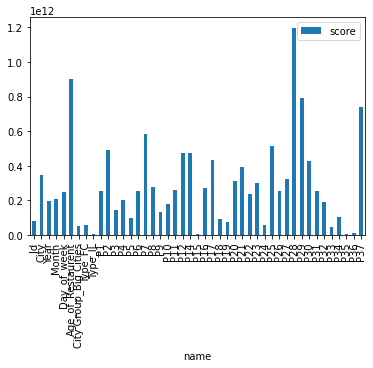

In [22]:
feature_dict = xgbr_best.get_booster().get_score(importance_type="gain")
feature_df = pd.DataFrame(feature_dict.items(),columns=["name","score"])
feature_df.plot(x="name",y="score",kind="bar")

TEST DATA

In [34]:
t = test.head(1).to_dict("records")[0]

In [ ]:
test['Year'] = pd.DatetimeIndex(test['Open Date']).year#year
test['Month'] = pd.DatetimeIndex(test['Open Date']).month#month
test['Day_of_week']=pd.DatetimeIndex(test['Open Date']).dayofweek# dayofweek
test['Weekend']=test.apply(lambda row: 1 if row['Day_of_week'] >= 5 else 0,axis=1)#weekend
test['Age_of_Restaurent']=test.apply(lambda row: get_age(row["Open Date"]),axis = 1)
# drop open date
test=test.drop("Open Date",axis = 1)
test

,Id,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Year,Month,Day_of_week,Weekend,Age_of_Restaurent
0,0,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2011,1,5,1,1804
1,1,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2011,3,4,0,1749
2,2,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2013,10,2,0,792
3,3,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,2013,5,0,0,969
4,4,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,2013,7,2,0,883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2000,1,2,0,5839
99996,99996,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2011,7,0,0,1627
99997,99997,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,2012,12,5,1,1097
99998,99998,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,2013,10,5,1,810


In [ ]:
test['City'] = city_label_encoder.transform(test['City'])
#one hot encoder for citygroup and type-train
test = pd.get_dummies(test, columns = ['City Group', 'Type'])
test

,Id,City,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Year,Month,Day_of_week,Weekend,Age_of_Restaurent,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB
0,0,38,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2011,1,5,1,1804,0,1,0,1,0,0
1,1,27,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2011,3,4,0,1749,0,1,0,0,1,0
2,2,3,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2013,10,2,0,792,1,0,0,1,0,0
3,3,26,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,2013,5,0,0,969,0,1,0,0,1,0
4,4,1,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,2013,7,2,0,883,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2000,1,2,0,5839,0,1,0,1,0,0
99996,99996,38,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2011,7,0,0,1627,0,1,0,0,1,0
99997,99997,54,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,2012,12,5,1,1097,1,0,0,0,1,0
99998,99998,54,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,2013,10,5,1,810,1,0,0,1,0,0


In [ ]:
p_columns = [column_name for column_name in test.columns if "P" in column_name]
non_p_columns = [column_name for column_name in test.columns if "P" not in column_name]
test_non_p_data = test[non_p_columns]
test_p_data = test[p_columns]
test_p_data = pd.DataFrame(minmax_scalar.transform(test_p_data),columns = p_columns)

In [ ]:
test = test_non_p_data.join(test_p_data)
test

,Id,City,Year,Month,Day_of_week,Weekend,Age_of_Restaurent,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,Type_MB,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,38,2011,1,5,1,1804,0,1,0,1,0,0,0.000000,0.461538,0.533333,0.222222,0.000000,0.111111,0.444444,0.333333,0.166667,0.166667,0.444444,0.125,0.222222,0.000000,0.0,0.000000,0.133333,0.000000,0.166667,0.285714,0.142857,0.00,0.125000,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
1,1,27,2011,3,4,0,1749,0,1,0,0,1,0,0.181818,0.461538,0.533333,0.222222,0.142857,0.111111,0.444444,0.222222,0.000000,0.000000,0.111111,0.250,0.444444,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.285714,0.142857,0.25,0.000000,0.0,0.0,0.00,0.00,0.000000,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
2,2,3,2013,10,2,0,792,1,0,0,1,0,0,0.181818,0.461538,0.533333,0.222222,0.142857,0.111111,0.444444,0.333333,0.000000,0.166667,0.333333,0.375,0.444444,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.285714,0.285714,1.00,0.166667,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
3,3,26,2013,5,0,0,969,0,1,0,0,1,0,0.090909,0.461538,0.533333,0.222222,0.142857,0.222222,0.444444,0.333333,0.166667,0.000000,0.222222,0.250,0.444444,0.000000,0.0,0.000000,0.000000,0.333333,0.125000,0.214286,0.142857,0.25,0.041667,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.266667,0.00,0.000000,0.000000,0.000000,0.0,0.00
4,4,1,2013,7,2,0,883,0,1,0,1,0,0,0.090909,0.461538,0.533333,0.222222,0.000000,0.111111,0.444444,0.333333,0.166667,0.000000,0.222222,0.375,0.222222,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.00,0.000000,0.0,0.0,0.00,0.00,0.347826,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,2000,1,2,0,5839,0,1,0,1,0,0,0.363636,0.615385,0.533333,0.222222,0.142857,0.111111,0.444444,0.444444,0.000000,0.000000,0.333333,0.250,0.222222,0.000000,0.0,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.50,0.041667,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
99996,99996,38,2011,7,0,0,1627,0,1,0,0,1,0,0.000000,0.153846,0.533333,0.000000,0.000000,0.000000,0.000000,0.444444,0.166667,0.166667,0.111111,0.250,0.444444,0.000000,0.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.041667,0.0,0.0,0.00,0.00,0.000000,0.400000,0.2,0.000000,0.00,0.000000,0.166667,0.000000,0.0,0.00
99997,99997,54,2012,12,5,1,1097,1,0,0,0,1,0,0.272727,0.615385,0.533333,0.222222,0.000000,0.111111,0.444444,0.222222,0.000000,0.166667,0.444444,0.250,0.444444,0.000000,0.4,0.266667,0.200000,0.250000,0.083333,0.285714,0.214286,1.00,0.166667,0.4,0.4,0.32,0.24,0.260870,0.133333,0.2,0.333333,0.12,0.333333,0.166667,0.266667,0.2,0.25
99998,99998,54,2013,10,5,1,810,1,0,0,1,0,0,1.000000,1.000000,0.800000,0.666667,0.428571,0.333333,1.000000,1.000000,1.000000,1.000000,0.555556,1.000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.791667,0.571429,0.142857,0.50,0.583333,0.0,0.2,0.00,0.00,0.565217,0.666667,0.0,0.000000,0.00,0.666667,0.000000,0.000000,0.0,0.00


In [ ]:
test = test[list(train_x.columns)]#here we have train ,test equal columns for both test and train
test
#type dt is missing in train data

,Id,City,Year,Month,Day_of_week,Weekend,Age_of_Restaurent,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,38,2011,1,5,1,1804,0,1,0,1,0,0.000000,0.461538,0.533333,0.222222,0.000000,0.111111,0.444444,0.333333,0.166667,0.166667,0.444444,0.125,0.222222,0.000000,0.0,0.000000,0.133333,0.000000,0.166667,0.285714,0.142857,0.00,0.125000,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
1,1,27,2011,3,4,0,1749,0,1,0,0,1,0.181818,0.461538,0.533333,0.222222,0.142857,0.111111,0.444444,0.222222,0.000000,0.000000,0.111111,0.250,0.444444,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.285714,0.142857,0.25,0.000000,0.0,0.0,0.00,0.00,0.000000,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
2,2,3,2013,10,2,0,792,1,0,0,1,0,0.181818,0.461538,0.533333,0.222222,0.142857,0.111111,0.444444,0.333333,0.000000,0.166667,0.333333,0.375,0.444444,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.285714,0.285714,1.00,0.166667,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
3,3,26,2013,5,0,0,969,0,1,0,0,1,0.090909,0.461538,0.533333,0.222222,0.142857,0.222222,0.444444,0.333333,0.166667,0.000000,0.222222,0.250,0.444444,0.000000,0.0,0.000000,0.000000,0.333333,0.125000,0.214286,0.142857,0.25,0.041667,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.266667,0.00,0.000000,0.000000,0.000000,0.0,0.00
4,4,1,2013,7,2,0,883,0,1,0,1,0,0.090909,0.461538,0.533333,0.222222,0.000000,0.111111,0.444444,0.333333,0.166667,0.000000,0.222222,0.375,0.222222,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.00,0.000000,0.0,0.0,0.00,0.00,0.347826,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,4,2000,1,2,0,5839,0,1,0,1,0,0.363636,0.615385,0.533333,0.222222,0.142857,0.111111,0.444444,0.444444,0.000000,0.000000,0.333333,0.250,0.222222,0.000000,0.0,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.50,0.041667,0.0,0.0,0.00,0.00,0.086957,0.400000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.00
99996,99996,38,2011,7,0,0,1627,0,1,0,0,1,0.000000,0.153846,0.533333,0.000000,0.000000,0.000000,0.000000,0.444444,0.166667,0.166667,0.111111,0.250,0.444444,0.000000,0.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.041667,0.0,0.0,0.00,0.00,0.000000,0.400000,0.2,0.000000,0.00,0.000000,0.166667,0.000000,0.0,0.00
99997,99997,54,2012,12,5,1,1097,1,0,0,0,1,0.272727,0.615385,0.533333,0.222222,0.000000,0.111111,0.444444,0.222222,0.000000,0.166667,0.444444,0.250,0.444444,0.000000,0.4,0.266667,0.200000,0.250000,0.083333,0.285714,0.214286,1.00,0.166667,0.4,0.4,0.32,0.24,0.260870,0.133333,0.2,0.333333,0.12,0.333333,0.166667,0.266667,0.2,0.25
99998,99998,54,2013,10,5,1,810,1,0,0,1,0,1.000000,1.000000,0.800000,0.666667,0.428571,0.333333,1.000000,1.000000,1.000000,1.000000,0.555556,1.000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.791667,0.571429,0.142857,0.50,0.583333,0.0,0.2,0.00,0.00,0.565217,0.666667,0.0,0.000000,0.00,0.666667,0.000000,0.000000,0.0,0.00


In [ ]:
results = rf_best.predict(test)
results

array([4415570.7 , 3538753.6 , 3247188.11, ..., 4474550.49, 4018288.02,
       5449211.34])

random forest regressor best model


In [ ]:
temp = []
for i,value in enumerate(results):
  temp.append({"Id":i,"Prediction":value})

In [ ]:
df=pd.DataFrame(temp)

In [ ]:
df.to_csv("anusha-submission-3_rf.csv",index=False)